<a href="https://colab.research.google.com/github/Educat8n/AI-Development-Oxford/blob/main/SVM_explanation_Kernel_trick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

def get_data_circular(circle_x=2, circle_y=3, rad=2.0):
    x1 = random.uniform(0, 2) * 2.0
    x2 = random.uniform(0, 3.0) * 2.0
    # Compare radius of circle
    # with distance of its center
    # from given point
    if ((x1 - circle_x) * (x1 - circle_x) +
        (x2 - circle_y) * (x2 - circle_y) <= rad * rad):
        label = 0 #return True;
    else:
        label = 1
    return [x1, x2, label]
 
# Driver Code
data = []
for i in range (100):
    data.append(get_data_circular())

In [ ]:
import pandas as pd
df = pd.DataFrame(data)
df.columns = ['x1', 'x2', 'label']
df.head()

,x1,x2,label
0,0.866928,3.918432,0
1,0.566557,2.019154,0
2,0.163499,5.190481,1
3,0.718847,4.534581,0
4,0.516528,0.697577,1


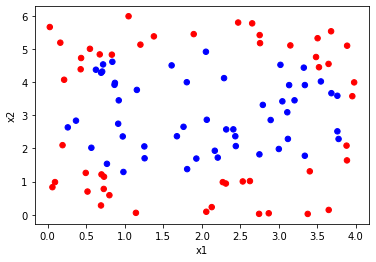

In [ ]:
colors = np.where(df.label> 0, 'r', 'b')
df.plot(kind='scatter', x='x1', y='x2', s = 30, c = colors)

In [ ]:
df['x1new'] = df['x1']* df['x1']
df['x2new'] = df['x2']* df['x2']
df['x3new'] = df['x1']* df['x2']
df['x3new'] = df['x3new'].apply(np.sqrt)

In [ ]:
df.head()

,x1,x2,label,x1new,x2new,x3new
0,0.866928,3.918432,0,0.751565,15.354106,1.843095
1,0.566557,2.019154,0,0.320987,4.076984,1.069564
2,0.163499,5.190481,1,0.026732,26.941089,0.921215
3,0.718847,4.534581,0,0.516741,20.562423,1.805456
4,0.516528,0.697577,1,0.266801,0.486613,0.600265


No handles with labels found to put in legend.


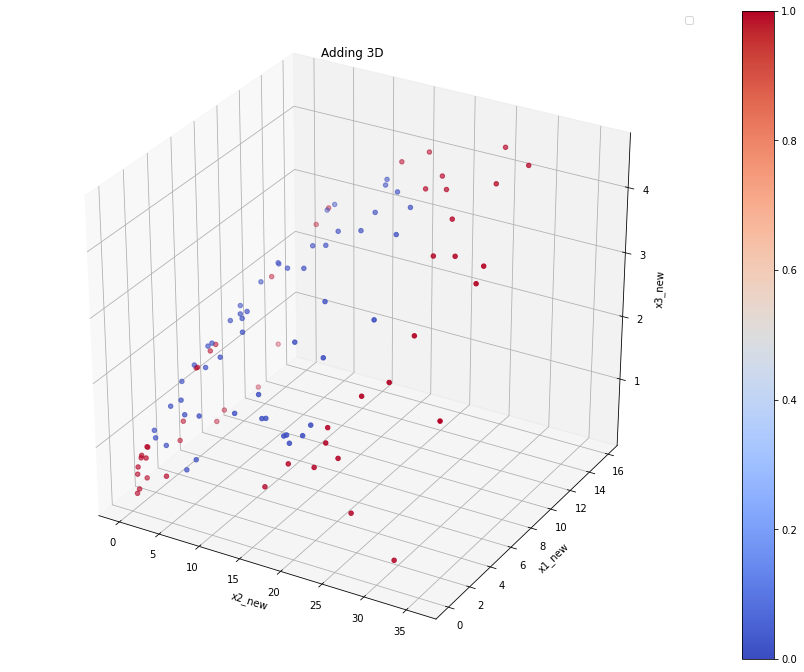

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)
y = df.iloc[:,3]
x = df.iloc[:,4]
z = df.iloc[:,5]
c = df['label']
cb = ax.scatter(x,y,z, c=c, cmap='coolwarm')

plt.title('Adding 3D')
ax.set_ylabel('x1_new')
ax.set_xlabel('x2_new')
ax.set_zlabel('x3_new')

# and here we add a colorbar
plt.colorbar(cb)

plt.legend()